---
### title:Coches
### author:Curso de Estadística Descriptiva
### date:9/1/2019
---


## Análisis de los coches (mtcars)

### Carga de datos

In [2]:
import warnings
warnings.filterwarnings('ignore')

from ggplot import mtcars
data = mtcars
data.index = data["name"]
print(data.head())

                                name   mpg  cyl   disp   hp  drat     wt  \
name                                                                       
Mazda RX4                  Mazda RX4  21.0    6  160.0  110  3.90  2.620   
Mazda RX4 Wag          Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875   
Datsun 710                Datsun 710  22.8    4  108.0   93  3.85  2.320   
Hornet 4 Drive        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215   
Hornet Sportabout  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440   

                    qsec  vs  am  gear  carb  
name                                          
Mazda RX4          16.46   0   1     4     4  
Mazda RX4 Wag      17.02   0   1     4     4  
Datsun 710         18.61   1   1     4     1  
Hornet 4 Drive     19.44   1   0     3     1  
Hornet Sportabout  17.02   0   0     3     2  


### Medidas de centralización

In [2]:
print(data.mean()) # Media por columnas
print(data.mean(axis = 1)) # Media por filas
print(data.median())
print(mtcars.mode())

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64
name
Mazda RX4              29.907273
Mazda RX4 Wag          29.981364
Datsun 710             23.598182
Hornet 4 Drive         38.739545
Hornet Sportabout      53.664545
Valiant                35.049091
Duster 360             59.720000
Merc 240D              24.634545
Merc 230               27.233636
Merc 280               31.860000
Merc 280C              31.787273
Merc 450SE             46.430909
Merc 450SL             46.500000
Merc 450SLC            46.350000
Cadillac Fleetwood     66.232727
Lincoln Continental    66.058545
Chrysler Imperial      65.972273
Fiat 128               19.440909
Honda Civic            17.742273
Toyota Corolla         18.814091
Toyota Corona          24.888636
Dodge Challenger       47.240909
AMC Javelin            46.007727
Camaro Z28  

### Medidas vs distribuciones

<Figure size 432x288 with 0 Axes>

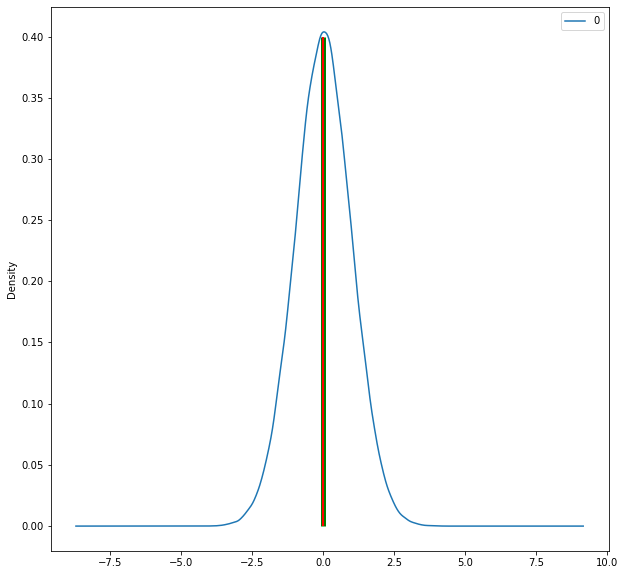

<Figure size 432x288 with 0 Axes>

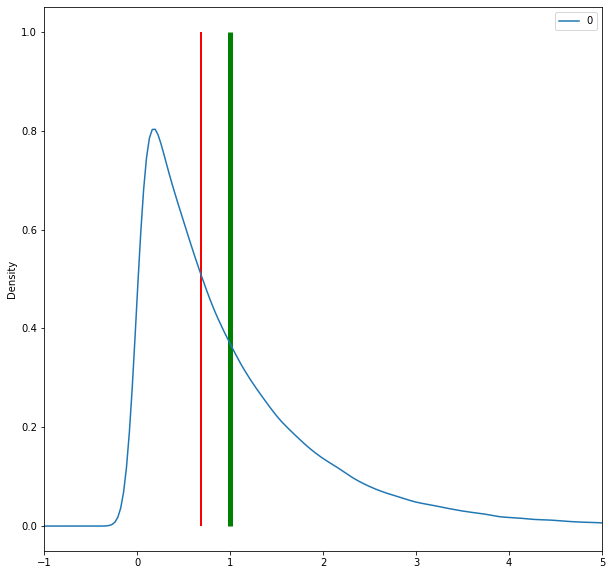

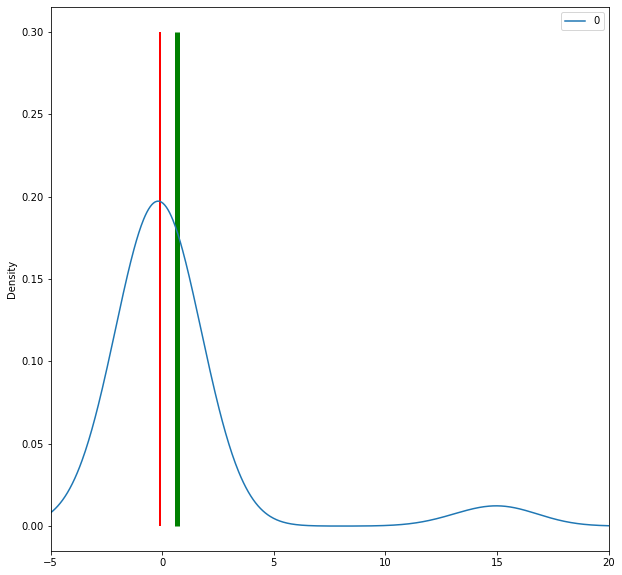

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.clf()
norm_data = pd.DataFrame(np.random.normal(size=100000))
norm_data.plot(kind="density", figsize=(10,10))
plt.vlines(norm_data.mean(), ymin = 0, ymax = 0.4, linewidth=5.0, color = "green")
plt.vlines(norm_data.median(), ymin = 0, ymax = 0.4, 
linewidth = 2.0, color = "red")
plt.show()


plt.clf()
skewed_data = pd.DataFrame(np.random.exponential(size=100000))
skewed_data.plot(kind="density", figsize=(10,10), xlim = (-1,5))
plt.vlines(skewed_data.mean(), ymin = 0, ymax = 1.0, linewidth=5.0, color = "green")
plt.vlines(skewed_data.median(), ymin = 0, ymax = 1.0, 
linewidth = 2.0, color = "red")
plt.show()


norm_data = np.random.normal(size = 50)
outliers = np.random.normal(15, size = 3)
combined_data = pd.DataFrame(np.concatenate((norm_data, outliers), axis = 0))

combined_data.plot(kind="density", figsize=(10,10), xlim = (-5,20))
plt.vlines(combined_data.mean(), ymin = 0, ymax = 0.3, linewidth=5.0, color = "green")
plt.vlines(combined_data.median(), ymin = 0, ymax = 0.3, 
linewidth = 2.0, color = "red")
plt.show()

### Medidas de dispersión
 - Rango de `mpg`, five nums, cuartiles

23.5
[10.4, 15.425, 19.2, 22.8, 33.9]
count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64
7.375


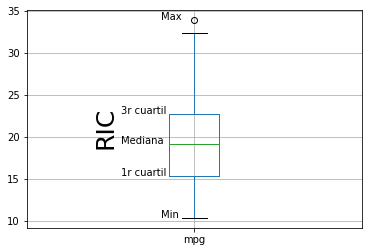

In [8]:
from ggplot import mtcars

rang = max(mtcars["mpg"]) - min(mtcars["mpg"])
print(rang)

five_nums = [mtcars["mpg"].quantile(0),
            mtcars["mpg"].quantile(0.25),
            mtcars["mpg"].quantile(0.5),
            mtcars["mpg"].quantile(0.75),
            mtcars["mpg"].quantile(1.0)
]
print(five_nums)

print(mtcars["mpg"].describe())

print(mtcars["mpg"].quantile(0.75) - mtcars["mpg"].quantile(0.25))

import matplotlib.pyplot as plt
plt.clf()
mtcars.boxplot(column = "mpg", return_type = "axes", figsize = (10,10))

plt.text(x=0.78, y = mtcars["mpg"].quantile(0.25), s = "1r cuartil")
plt.text(x=0.78, y = mtcars["mpg"].quantile(0.5), s = "Mediana")
plt.text(x=0.78, y = mtcars["mpg"].quantile(0.75), s = "3r cuartil")

plt.text(x=0.9, y = mtcars["mpg"].quantile(0), s = "Min")
plt.text(x=0.9, y = mtcars["mpg"].quantile(1), s = "Max")

plt.text(x = 0.7, y = mtcars["mpg"].quantile(0.5), s = "RIC", rotation = 90, size = 25)
plt.show()

- Varianza y desviación típica

In [4]:
from ggplot import mtcars

print(mtcars["mpg"].var())
print(mtcars["mpg"].std())

36.32410282258064
6.026948052089104
5.411490000000001


- Desviacion mediana absoluta

In [9]:
mad = abs(mtcars["mpg"]-mtcars["mpg"].median())
k = 1.4826
print(mad.median()*k)

5.411490000000001


- El sesgo y la curtosis

In [10]:
from ggplot import mtcars

print(mtcars["mpg"].skew())
print(mtcars["mpg"].kurt())

0.6723771376290805
-0.0220062914240855


<Figure size 432x288 with 0 Axes>

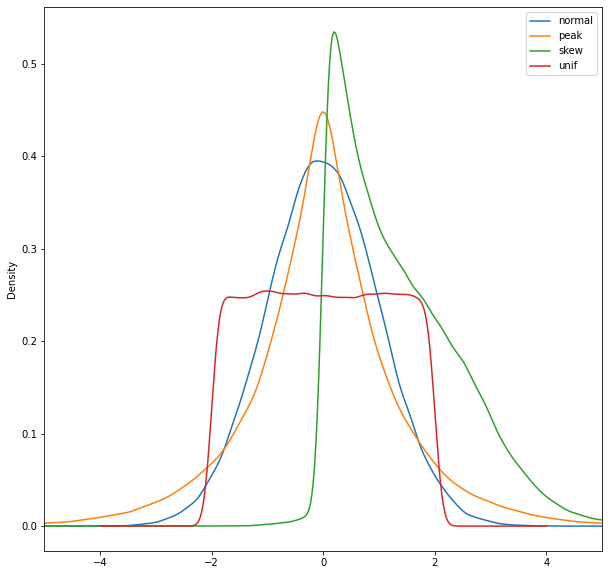

Normal, Sesgo = 0.010573, Curtosis = -0.003511
Normal+Exp, Sesgo = 0.996672, Curtosis = 1.195333
Uniforme, Sesgo = 0.002519, Curtosis = -1.199866
Suma de Exp, Sesgo = 0.015400, Curtosis = 3.094014


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

norm = np.random.normal(size=100000)
skew = np.concatenate((np.random.normal(size=35000)+2, 
                      np.random.exponential(size=65000)),
                      axis = 0)
unif = np.random.uniform(-2,2,size = 100000)
peak = np.concatenate((np.random.exponential(size=50000),
                      np.random.exponential(size=50000)*(-1)),
                      axis = 0)


data = pd.DataFrame({
  "normal": norm,
  "skew": skew,
  "unif": unif,
  "peak": peak
})

plt.clf()
data.plot(kind="density", figsize = (10,10), xlim = (-5,5))
plt.show()

print("Normal, Sesgo = %f, Curtosis = %f"%(data["normal"].skew(), data["normal"].kurt()))
print("Normal+Exp, Sesgo = %f, Curtosis = %f"%(data["skew"].skew(), data["skew"].kurt()))
print("Uniforme, Sesgo = %f, Curtosis = %f"%(data["unif"].skew(), data["unif"].kurt()))
print("Suma de Exp, Sesgo = %f, Curtosis = %f"%(data["peak"].skew(), data["peak"].kurt()))